In [1]:
import numpy as np
import os
import time
from vgg16 import VGG16
from keras.preprocessing import image
from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation,Flatten

from imagenet_utils import preprocess_input
from keras.layers import Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# Loading the training data
PATH = os.getcwd()
# Define data path
data_path = PATH + '/newdata'
data_dir_list = os.listdir(data_path)

In [3]:
img_data_list=[]

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		img_path = data_path + '/'+ dataset + '/'+ img 
		img = image.load_img(img_path, target_size=(224, 224))
		x = image.img_to_array(img)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
		print('Input image shape:', x.shape)
		img_data_list.append(x)

Loaded the images of dataset-ripe

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 2

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 

In [4]:
img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

(400, 1, 224, 224, 3)
(1, 400, 224, 224, 3)
(400, 224, 224, 3)


In [5]:
num_classes = 2
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:199]=0
labels[200:]=1


names = ['ripe','unripe']

In [6]:
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [7]:
# Fine tune the vgg 16
#image_input = Input(shape=(224, 224, 3))
model = VGG16(weights='imagenet',include_top=False)
model.summary()
last_layer = model.output
# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(last_layer)
# add fully-connected & dropout layers
x = Dense(512, activation='relu',name='fc-1')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu',name='fc-2')(x)
x = Dropout(0.5)(x)
# a softmax layer for 4 classes
out = Dense(num_classes, activation='softmax',name='output_layer')(x)

# this is the model we will train
custom_vgg_model2 = Model(inputs=model.input, outputs=out)

custom_vgg_model2.summary()

for layer in custom_vgg_model2.layers[:-6]:
	layer.trainable = False

custom_vgg_model2.layers[-1].trainable

custom_vgg_model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

t=time.time()
hist = custom_vgg_model2.fit(X_train, y_train, batch_size=16, epochs=100, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

320/320 [==============================] - 7s 23ms/step - loss: 0.3575 - acc: 0.9156 - val_loss: 0.1315 - val_acc: 0.9375
Epoch 14/100
320/320 [==============================] - 7s 23ms/step - loss: 0.2304 - acc: 0.9312 - val_loss: 0.1416 - val_acc: 0.9500
Epoch 15/100
320/320 [==============================] - 7s 23ms/step - loss: 0.2123 - acc: 0.9438 - val_loss: 0.2339 - val_acc: 0.9125
Epoch 16/100
320/320 [==============================] - 7s 23ms/step - loss: 0.2360 - acc: 0.9281 - val_loss: 0.1488 - val_acc: 0.9625
Epoch 17/100
320/320 [==============================] - 7s 23ms/step - loss: 0.1762 - acc: 0.9594 - val_loss: 0.0939 - val_acc: 0.9625
Epoch 18/100
320/320 [==============================] - 7s 23ms/step - loss: 0.1484 - acc: 0.9563 - val_loss: 0.1820 - val_acc: 0.9250
Epoch 19/100
320/320 [==============================] - 7s 23ms/step - loss: 0.1613 - acc: 0.9500 - val_loss: 0.2306 - val_acc: 0.9000
Epoch 20/100
320/320 [==============================] - 7s 23ms/step

Epoch 74/100
320/320 [==============================] - 7s 22ms/step - loss: 0.0973 - acc: 0.9812 - val_loss: 0.1820 - val_acc: 0.9500
Epoch 75/100
320/320 [==============================] - 7s 23ms/step - loss: 0.0804 - acc: 0.9844 - val_loss: 0.1360 - val_acc: 0.9625
Epoch 76/100
320/320 [==============================] - 7s 23ms/step - loss: 0.1126 - acc: 0.9750 - val_loss: 0.0541 - val_acc: 0.9875
Epoch 77/100
320/320 [==============================] - 7s 23ms/step - loss: 0.1206 - acc: 0.9719 - val_loss: 0.0573 - val_acc: 0.9625
Epoch 78/100
320/320 [==============================] - 7s 23ms/step - loss: 0.0875 - acc: 0.9812 - val_loss: 0.0903 - val_acc: 0.9750
Epoch 79/100
320/320 [==============================] - 7s 23ms/step - loss: 0.0768 - acc: 0.9812 - val_loss: 0.0971 - val_acc: 0.9625
Epoch 80/100
320/320 [==============================] - 7s 23ms/step - loss: 0.0873 - acc: 0.9875 - val_loss: 0.1646 - val_acc: 0.9500
Epoch 81/100
320/320 [==============================] -

In [8]:
custom_vgg_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [9]:
model.save('ripe_unripe_VGG16_finetune.model')

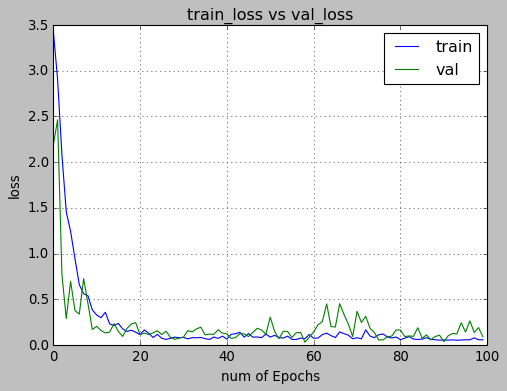

In [12]:
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(100)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])

#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

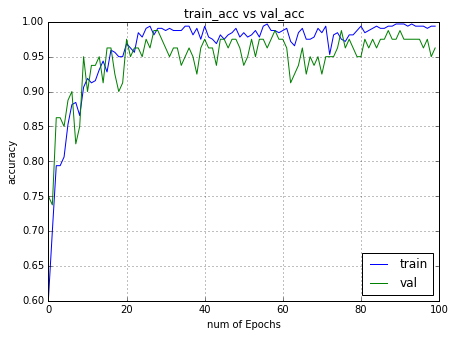

In [11]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])